Mějme funkci $ f(x) = 2x^2 + 4x - 3 $ \
Najděme kořeny numericky.

$x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$

Najděme numericky extrém.\
$x_{i+1} = x_{i} - \frac{f'(x_{i})}{f"(x_{i})}$


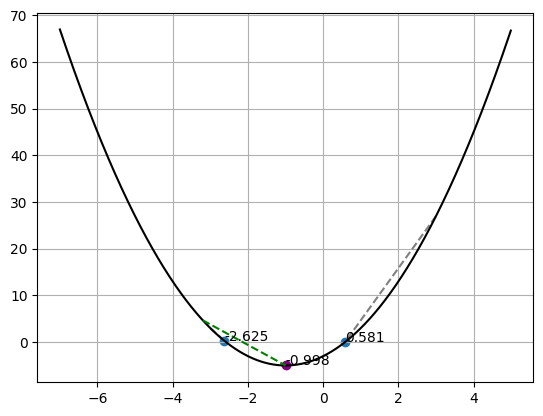

In [138]:
from typing import Callable, Sequence, Optional
import matplotlib.pyplot as plt

delta:         float = 1e-6
targetResidual:float = 1e-12

f:  Callable[[float], float]    = lambda xi: 2*xi**2 + 4*xi - 3
df: Callable[[float], float]    = lambda xi: (f(xi+delta)-f(xi-delta))/(2*delta)#(f(xi+delta)-f(xi))/(1*delta)#(f(xi+delta)-f(xi-delta))/(2*delta)
ddf:Callable[[float], float]    = lambda xi: (f(xi+delta) - 2*f(xi) + f(xi-delta))/(delta**2)
def newton1DRoot(f: Callable[[float], float], x0: float = 0, targetStop: Optional[float] = targetResidual, maxIter: Optional[int] = 10000) -> float:
    xOld:     float = x0
    xNew:     float = x0 - f(x0)/df(x0)

    iteration:  int = 0
    
    residual:   Callable[[None], float] = lambda: xNew - xOld
    condition:  Callable[[None], bool]  = lambda: (residual() < targetResidual) and (iteration < maxIter)
    
    while condition():
        xOld = xNew
        try: xNew = xOld - f(xOld)/df(xOld)
        except ZeroDivisionError:
            raise ZeroDivisionError(f"xOLD={xOld}, xNEW= {xNew}, f({xNew})= {f(xNew)}, df({xNew})= {df(xNew)}")
        iteration += 1
    return xNew

def newton1DExtreme(f: Callable[[float], float], x0: float = 0, targetStop: Optional[float] = targetResidual, maxIter: Optional[int] = 10000) -> float:
    xOld:     float = x0
    xNew:     float = x0 - df(x0)/ddf(x0)

    iteration:  int = 0
    
    residual:   Callable[[None], float] = lambda: xNew - xOld
    condition:  Callable[[None], bool]  = lambda: (residual() < targetResidual) and (iteration < maxIter)
    
    while condition():
        xOld = xNew
        try: xNew = xOld - df(xOld)/ddf(xOld)
        except ZeroDivisionError:
            raise ZeroDivisionError(f"xOLD={xOld}, xNEW= {xNew}, df({xNew})= {df(xNew)}, ddf({xNew})= {ddf(xNew)}")
        iteration += 1
    return xNew

x: Sequence[float] = [_*1e-2 for _ in range(-700, 500)]
y: Sequence[float] = [f(xi) for xi in x]

initialGuesses: Sequence[float] = [-3, +3]
roots: Sequence[float] = [newton1DRoot(f= f, x0=initialGuess) for initialGuess in initialGuesses]

for xi,rooti in zip(initialGuesses, roots):
    plt.plot(
        [xi, rooti],
        [f(xi), f(rooti)],
        color="gray",
        linestyle="dashed")


solutions: Sequence[float] = [f(root) for root in roots]
plt.scatter(roots, solutions)
for xi,yi in zip(roots, solutions): plt.text(xi,yi, s=f"{xi:.3F}")
plt.plot(x,y, color="black", linestyle="solid")

initialGuesses = [-3.2]
minima: float  = [newton1DExtreme(f=f, x0=initialGuess) for initialGuess in initialGuesses]
yMinima: float = [f(minimum) for minimum in minima]
for xi,minimumi in zip(initialGuesses, minima):
    plt.plot(
        [xi, minimumi],
        [f(xi), f(minimumi)],
        color="green",
        linestyle="dashed")
    
plt.scatter(minima, yMinima, c="purple")
for xi,yi in zip(minima, yMinima): plt.text(xi,yi, s=f"{xi:.3F}")
plt.grid()



Teď to zkusme ve 2D.

$f(x,y) = 0.5x^2 + 2x + y^2 + y + 3$

$\begin{bmatrix} x_{i+1} \\\ y_{i+1} \end{bmatrix} = \begin{bmatrix} x_i \\\ y_i \end{bmatrix} - H^{-1}\nabla{f(x,y)} $

H... inverzní matice Hessiánu (matice 2. derivací)
$\nabla$... gradient

$G = \begin{bmatrix} \frac{\partial{f(x,y)}}{\partial{x}} \\\ \frac{\partial{f(x,y)}}{\partial{y}} \end{bmatrix}$

$H = \begin{bmatrix} \frac{\partial^2{f(x,y)}}{\partial{x}^2} & \frac{\partial^2{f(x,y)}}{\partial{x}\partial{y}} \\\ \frac{\partial^2{f(x,y)}}{\partial{y}\partial{x}} & \frac{\partial^2{f(x,y)}}{\partial{y}^2} \end{bmatrix}$


Zde máme analytickou funkci a spojitá data, tak to jde. V jiném případě ovšem není jen tak možné aproximovat Hessián.\
Pro nespojitá data... používáme nástavbu Gauss-Newtonovu metodu.

$G = \begin{bmatrix} x + 2  \\\ 2y + 1 \end{bmatrix}$

$H = \begin{bmatrix} 1 & 0  \\\ 0 & 2 \end{bmatrix}$


$H^{-1} = \begin{bmatrix} 1 & 0  \\\ 0 & 0.5 \end{bmatrix}$

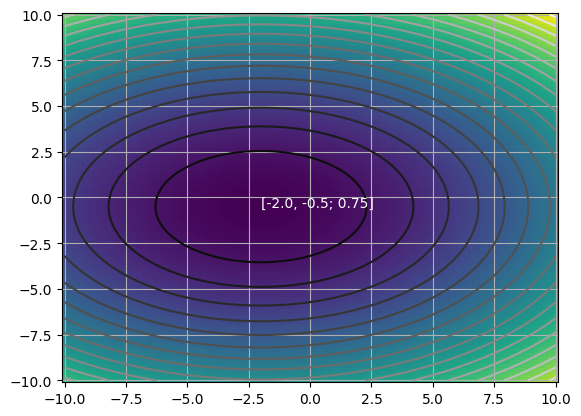

In [139]:
import typing
import numpy.typing as npt
import numpy as np
xx:     npt.NDArray[np.float32]
yy:     npt.NDArray[np.float32]
fxy:    npt.NDArray[np.float32]
fxy1:   typing.Callable[[float,float], float]
t: npt.NDArray[np.float32] = np.linspace(-10., +10., 101)

xx,yy = np.meshgrid(t,t)
fxy   = (0.5*xx**2) + (2.0*xx) + (yy**2) + (yy) + 3.0


fxy1  = lambda xi,yi: (0.5*xi**2) + (2.0*xi) + (yi**2) + (yi) + 3.0
dfdx1:   npt.NDArray[np.float32]  = lambda xi,yi: xi + 2.
dfdxdx1: npt.NDArray[np.float32]  = lambda xi,yi: 1.0
dfdxdy1: npt.NDArray[np.float32]  = lambda xi,yi: 0.0

dfdy1:   npt.NDArray[np.float32]  = lambda xi,yi: 2.0*yi + 1
dfdydy1: npt.NDArray[np.float32]  = lambda xi,yi: 2.0
dfdydx1: npt.NDArray[np.float32]  = lambda xi,yi: 0.0

grad1:    typing.Callable[[float, float], npt.NDArray[np.float32]] = lambda xi, yi: np.matrix([[xi+2.0],[2.0*yi+1]])

hess1:    typing.Callable[[float, float], npt.NDArray[np.float32]] = lambda xi, yi: np.matrix([[dfdxdx1(xi,yi), dfdxdy1(xi,yi)], [dfdydx1(xi,yi), dfdydy1(xi,yi)]])
hessInv1: typing.Callable[[float, float], npt.NDArray[np.float32]] = lambda xi, yi: hess1(xi,yi).I

curIter:        int     = 0
maxResidual:    float   = 1e-6

xInit:float = 11.0
yInit:float = 2.0
xOld: float
yOld: float
xNew: float
yNew: float

xyMatrix_old: npt.NDArray[np.float32] = np.matrix([[xInit], [yInit]])
xOld, yOld = xyMatrix_old.T.A1.tolist()
xyMatrix_new: npt.NDArray[np.float32] = xyMatrix_old - (hessInv1(xInit, yInit) @ grad1(xInit, yInit))


while curIter < 101:
    xOld,yOld = xNew, yNew
    xyMatrix_old    = xyMatrix_new
    hI              = hessInv1(xOld, yOld)
    G               = grad1(xOld, yOld)
    xyMatrix_new    = xyMatrix_old - (hI @ G)
    xNew, yNew = xyMatrix_new.T.A1.tolist()
    curIter += 1

plt.scatter(xNew, yNew, s=20, c="white")
plt.text(xNew, yNew, s=f"[{xNew}, {yNew}; {fxy1(xNew, yNew)}]", color="white")
plt.pcolormesh(xx,yy,fxy)
plt.contour(xx,yy,fxy,levels=21,cmap="gray")
plt.grid()


Mějme funkci, kterou chceme proložit křivkou (Gaussovský rozpad)

$y = y_0e^{-kt}$

Suma čtverce rozdílů reziduálů je

$SSRE = \sum {({y_i}_t - {y_i}_m)^2} $ \
$SSRE = \sum {({y_i}_t - {y_0e^{-k{t_i}_m}})^2} $
\
\
První derivace dle k:\
$\frac{\partial{(SSRE)}}{\partial{k}} = \sum {2 (y_i - y_0e^{-kt_i})·t_i(y_0e^{-kt_i})}$

Druhá derivace dle k:\
$\frac{\partial^2{(SSRE)}}{\partial{k^2}} = \sum {2(-y_i{t_i}^2y_0e^{-kt_i} + t_i^2y_0(e^{-kt_i})^2 - (t_iy_0e^{-kt_i})^2)}$
\
\
\
Lepší je snad tu hrůzu obejít numericky.

$f'(x) = \frac{f(x+h) - f(x-h)}{2h}$

$f''(x) = \frac{f(x+h) -2f(x)+ f(x-h)}{h^2}$


Použitá data

    x   y
    147.8   0
    78.3    20
    44.7    40
    29.5    60
    15.2    80
    7.8     100
    3.2     120

Předpokládejme, že y0 = -146

In [ ]:
x: typing.Sequence[float]   = 147.8, 78.3, 44.7, 29.5, 15.2, 7.82, 3.2
y: typing.Sequence[int]     = 0, 20, 40, 60, 80, 100, 120

def f(xValue: float, kValue: float) -> float:
    return -146*2.718**(-kValue*xValue)

def df(f: typing.Callable[[float, float], float], xValue: float) -> float:
    h:float = 1e-6
    return ((xValue+h) - f(xValue-h))/(2*h)

def ddf(f: typing.Callable[[float, float], float], xValue: float) -> float:
    h:float = 1e-6
    return ((xValue+h) - 2*f(xValue) + f(xValue-h))/(h*h)

def residual(xTheor: float, xMeas: float) -> float: return xTheor - xMeas

def squareResidual(xTheor: float, xMeas: float) -> float: return residual(xTheor, xMeas)**2

def sumSquareResiduals(theoreticalValues: typing.Sequence[float], measuredValues: typing.Sequence[float]) -> float:
    return sum([squareResidual(xi_t, xi_m) for xi_t, xi_m in zip(theoreticalValues, measuredValues)])

